In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

df = pd.read_csv('data.csv')

In [6]:
print(df)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [7]:
df['isFraud'] = df['isFraud'].astype('object')

In [8]:
print('Maximum number of missing values in any column: ' +
str(df.isnull().sum().max()))

Maximum number of missing values in any column: 0


In [9]:
data = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new data now has ', len(df), ' transactions.')

The new data now has  6362620  transactions.


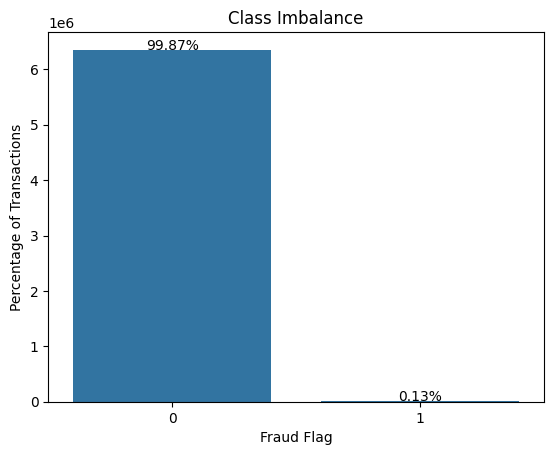

In [10]:
class_counts = df['isFraud'].value_counts()

# Create a bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)

# Customize the plot
plt.title('Class Imbalance')
plt.xlabel('Fraud Flag')
plt.ylabel('Percentage of Transactions')

# Add percentage labels on top of the bars
total = class_counts.sum()
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.1, f'{count/total*100:.2f}%', ha='center')


# Show the plot
plt.show()

C:\Users\rutuj\AppData\Local\Temp\ipykernel_28736\3424815036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, palette=colors)


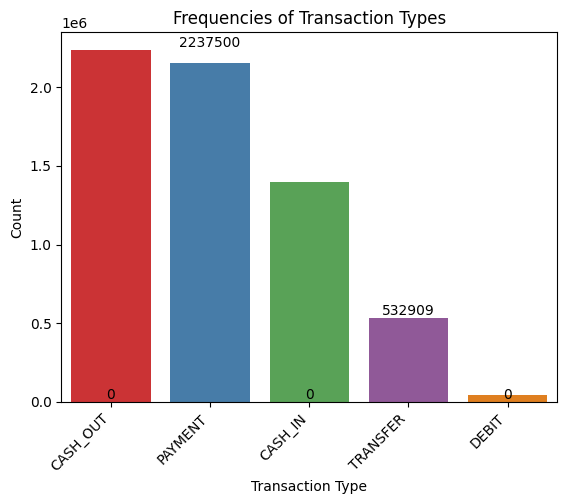

In [11]:

selected_types = ['CASH_IN', 'CASH_OUT', 'PAYMENT', 'TRANSFER', 'DEBIT']
filtered_data = df[df['type'].isin(selected_types)]

transaction_type_counts = filtered_data['type'].value_counts()

colors = sns.color_palette("Set1", n_colors=len(selected_types))
sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, palette=colors)

for i, ttype in enumerate(selected_types):
    count = data[data['type'] == ttype].shape[0]
    plt.text(i, count + 500, f'{count}', ha='center', va='bottom', fontsize=10)

plt.title('Frequencies of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\rutuj\AppData\Local\Temp\ipykernel_28736\143301221.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_transaction_counts.index, y=fraud_transaction_counts.values, palette=colors)


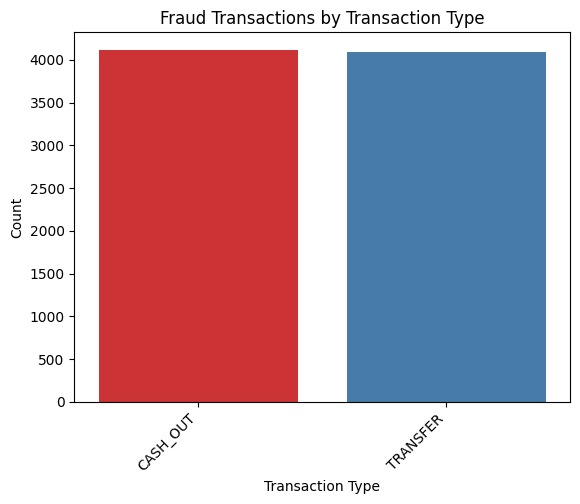

In [12]:
fraud_data = df[df['isFraud'] == 1]

fraud_transaction_counts = fraud_data['type'].value_counts()

colors = sns.color_palette("Set1", n_colors=len(fraud_transaction_counts))

sns.barplot(x=fraud_transaction_counts.index, y=fraud_transaction_counts.values, palette=colors)

plt.title('Fraud Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

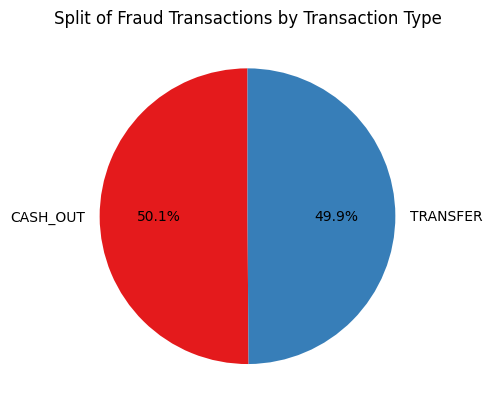

In [13]:
fraud_data = data[data['isFraud'] == 1]

fraud_transaction_counts = fraud_data['type'].value_counts()

plt.pie(fraud_transaction_counts, labels=fraud_transaction_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set1"))

plt.title('Split of Fraud Transactions by Transaction Type')

plt.show()

In [14]:
data = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new data now has ', len(data), ' transactions.')

The new data now has  2770409  transactions.


In [15]:
print(df)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest isFraud  \
0             160296.36  M1979787155            0.00            0.00       0   
1              19384.72  M204428222

In [16]:
print('Number of transactions where the transaction amount is negative: ' +
str(sum(data['amount'] < 0)))

Number of transactions where the transaction amount is negative: 0


In [17]:
print('Number of transactions where the transaction amount is negative: ' +
str(sum(data['amount'] == 0)))

Number of transactions where the transaction amount is negative: 16


In [18]:
# Remove 0 amount values
data = df.loc[df['amount'] > 0,:]

In [19]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:

percentage_zero_initial_balance_originator = (len(data[data['oldbalanceOrg'] == 0]) / len(data)) * 100
print(f"Percentage of instances where originator’s initial balance is 0: {percentage_zero_initial_balance_originator:.2f}%")

percentage_zero_final_balance_recipient = (len(data[data['newbalanceDest'] == 0]) / len(data)) * 100
print(f"Percentage of instances where recipient’s final balance is 0: {percentage_zero_final_balance_recipient:.2f}%")


Percentage of instances where originator’s initial balance is 0: 33.04%
Percentage of instances where recipient’s final balance is 0: 38.34%


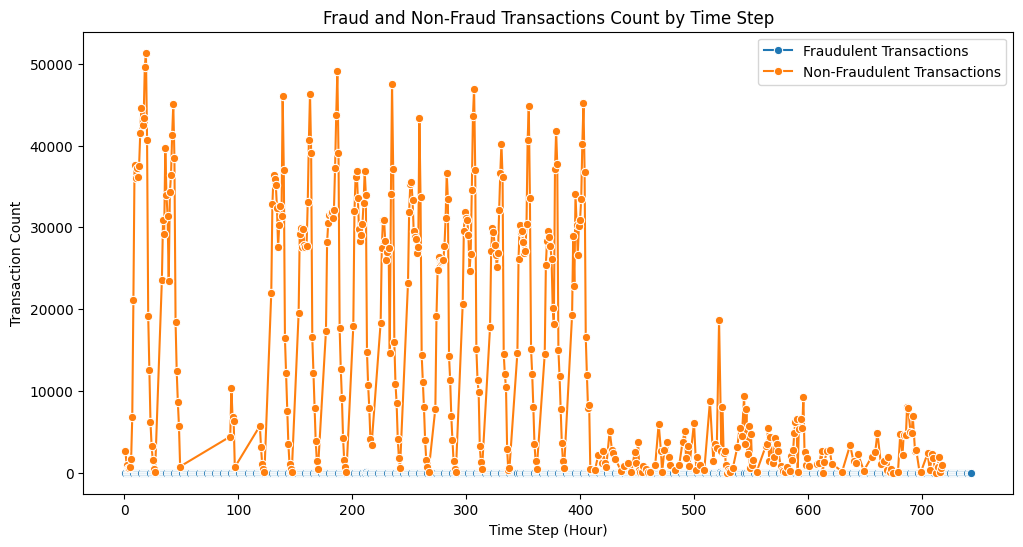

In [21]:
fraud_counts = data[data['isFraud'] == 1]['step'].value_counts().sort_index()
non_fraud_counts = data[data['isFraud'] == 0]['step'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fraud_counts.index, y=fraud_counts.values, label='Fraudulent Transactions', marker='o')
sns.lineplot(x=non_fraud_counts.index, y=non_fraud_counts.values, label='Non-Fraudulent Transactions', marker='o')

plt.title('Fraud and Non-Fraud Transactions Count by Time Step')
plt.xlabel('Time Step (Hour)')
plt.ylabel('Transaction Count')
plt.legend()

plt.show()

C:\Users\rutuj\AppData\Local\Temp\ipykernel_28736\3535299016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=data, palette='Set1')


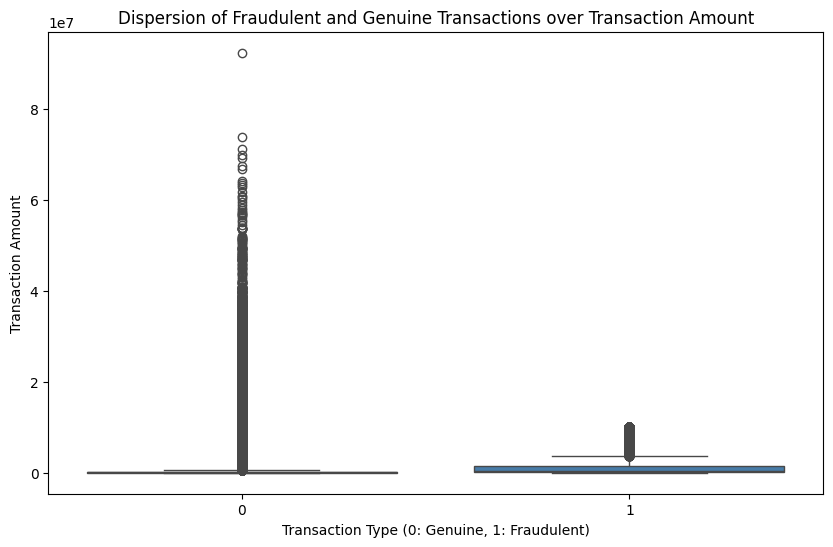

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data, palette='Set1')

plt.title('Dispersion of Fraudulent and Genuine Transactions over Transaction Amount')
plt.xlabel('Transaction Type (0: Genuine, 1: Fraudulent)')
plt.ylabel('Transaction Amount')

plt.show()

In [23]:
# Calculate the percentage of fraudulent transactions where initial balance of originator is 0
fraud_init_balance_zero = data[(data['isFraud'] == 1) & (data['oldbalanceOrg'] == 0)].shape[0] / data[data['isFraud'] == 1].shape[0] * 100

# Calculate the percentage of genuine transactions where initial balance of originator is 0
genuine_init_balance_zero = data[(data['isFraud'] == 0) & (data['oldbalanceOrg'] == 0)].shape[0] / data[data['isFraud'] == 0].shape[0] * 100

# Display the results
print(f'% of fraudulent transactions where initial balance of originator is 0: {fraud_init_balance_zero:.2f}%')
print(f'% of genuine transactions where initial balance of originator is 0: {genuine_init_balance_zero:.2f}%')

% of fraudulent transactions where initial balance of originator is 0: 0.30%
% of genuine transactions where initial balance of originator is 0: 33.09%


In [24]:
# Defining inaccuracies in originator and recipient balances
data['origBalance_inacc'] = (data['oldbalanceOrg'] - data['amount']) - data['newbalanceOrig']
data['destBalance_inacc'] = (data['oldbalanceDest'] + data['amount']) - data['newbalanceDest']

# Checking the percentage of transactions with inaccuracies in originator balances
orig_balance_inacc_percentage = (data[data['origBalance_inacc'] != 0].shape[0] / data.shape[0]) * 100

# Checking the percentage of transactions with inaccuracies in recipient balances
dest_balance_inacc_percentage = (data[data['destBalance_inacc'] != 0].shape[0] / data.shape[0]) * 100

# Displaying the results
print(f'% transactions where originator balances are not accurately captured: {orig_balance_inacc_percentage:.2f}%')
print(f'% transactions where destination balances are not accurately captured: {dest_balance_inacc_percentage:.2f}%')

C:\Users\rutuj\AppData\Local\Temp\ipykernel_28736\3957933738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['origBalance_inacc'] = (data['oldbalanceOrg'] - data['amount']) - data['newbalanceOrig']
C:\Users\rutuj\AppData\Local\Temp\ipykernel_28736\3957933738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['destBalance_inacc'] = (data['oldbalanceDest'] + data['amount']) - data['newbalanceDest']


% transactions where originator balances are not accurately captured: 85.09%
% transactions where destination balances are not accurately captured: 74.45%


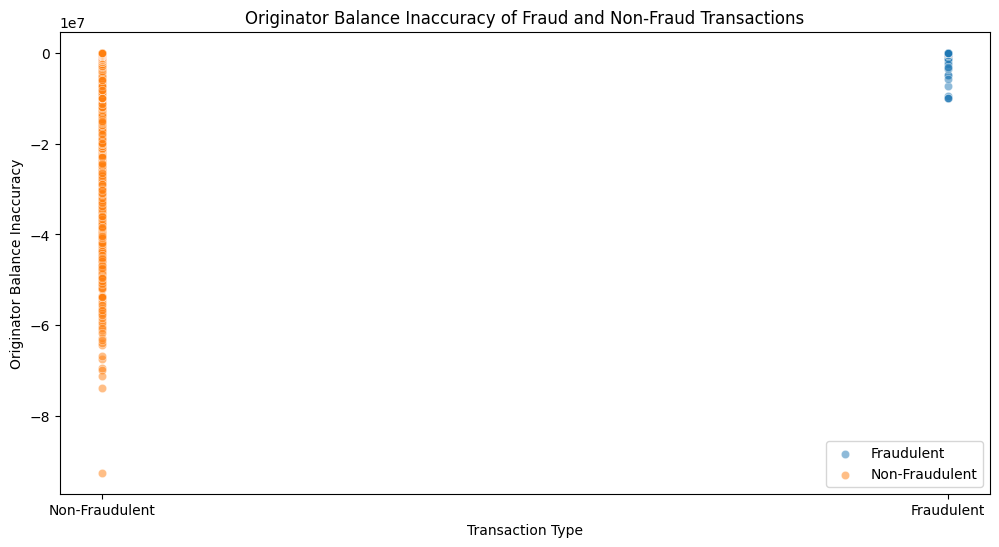

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for originator balance inaccuracy
plt.figure(figsize=(12, 6))

# Fraudulent transactions
sns.scatterplot(x='isFraud', y='origBalance_inacc', data=data[data['isFraud'] == 1], label='Fraudulent', alpha=0.5)

# Non-fraudulent transactions
sns.scatterplot(x='isFraud', y='origBalance_inacc', data=data[data['isFraud'] == 0], label='Non-Fraudulent', alpha=0.5)

plt.title('Originator Balance Inaccuracy of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Originator Balance Inaccuracy')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

plt.legend()
plt.show()


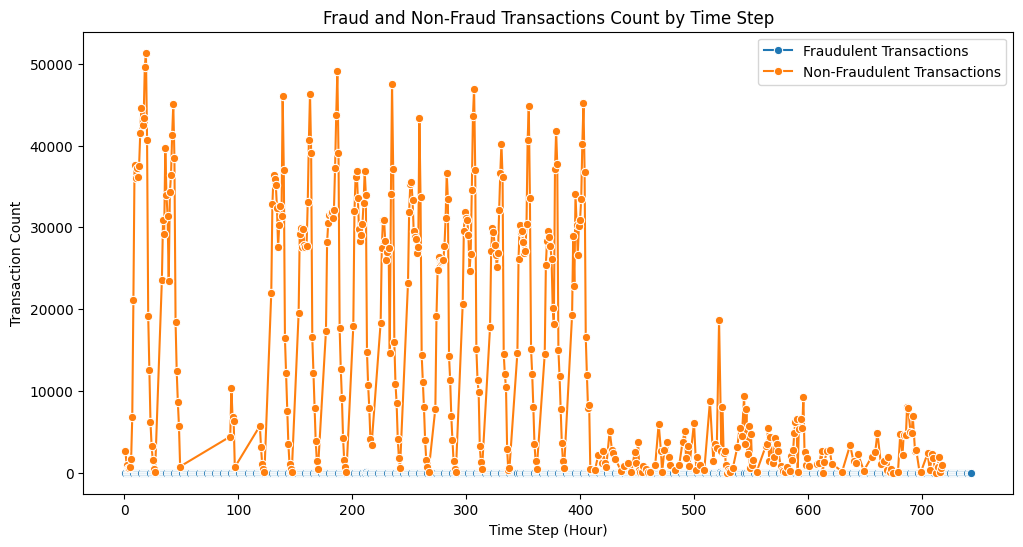

In [26]:


fraud_counts = data[data['isFraud'] == 1]['step'].value_counts().sort_index()
non_fraud_counts = data[data['isFraud'] == 0]['step'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fraud_counts.index, y=fraud_counts.values, label='Fraudulent Transactions', marker='o')
sns.lineplot(x=non_fraud_counts.index, y=non_fraud_counts.values, label='Non-Fraudulent Transactions', marker='o')

plt.title('Fraud and Non-Fraud Transactions Count by Time Step')
plt.xlabel('Time Step (Hour)')
plt.ylabel('Transaction Count')
plt.legend()

plt.show()

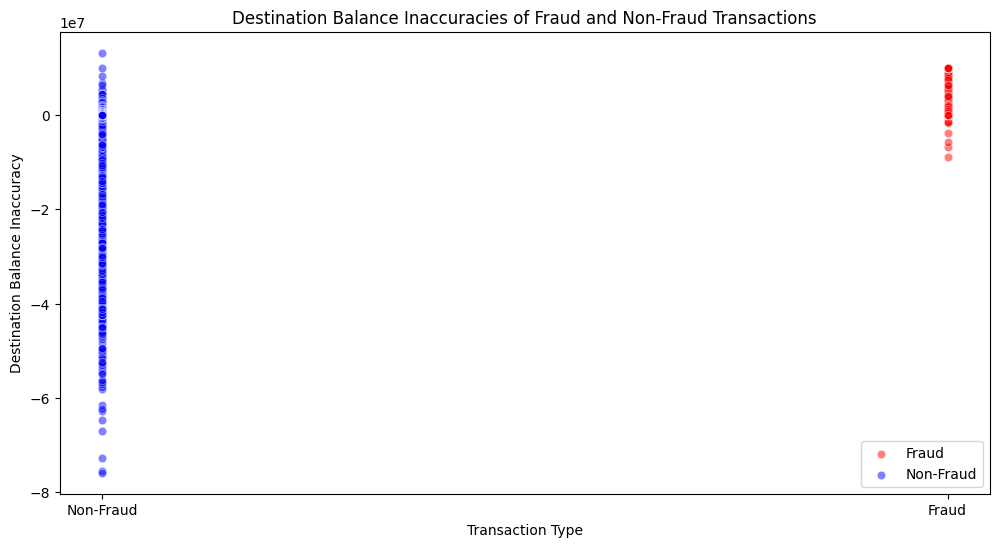

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot for fraud transactions
sns.scatterplot(x='isFraud', y='destBalance_inacc', data=data[data['isFraud'] == 1], alpha=0.5, label='Fraud', color='red')

# Scatter plot for non-fraud transactions
sns.scatterplot(x='isFraud', y='destBalance_inacc', data=data[data['isFraud'] == 0], alpha=0.5, label='Non-Fraud', color='blue')

plt.title('Destination Balance Inaccuracies of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Destination Balance Inaccuracy')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.legend()
plt.show()


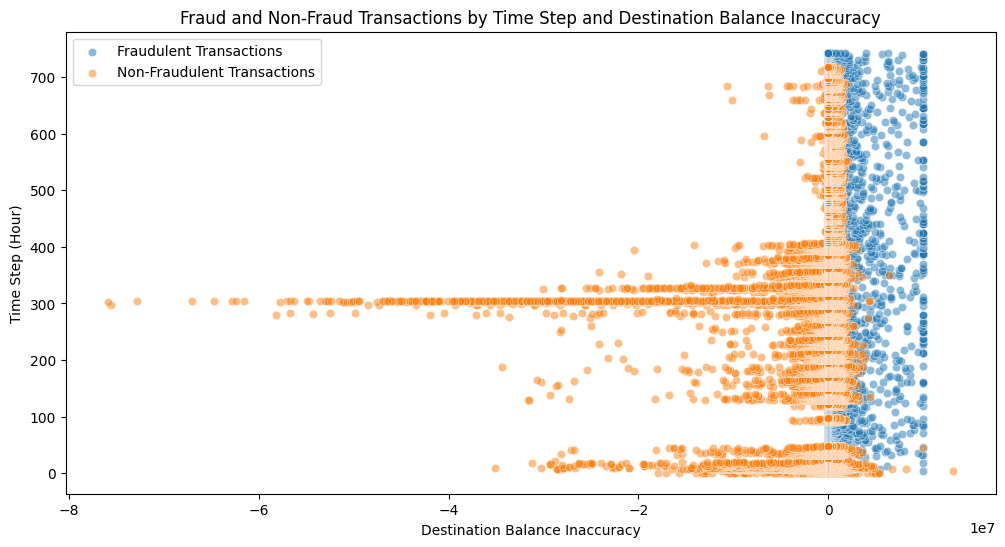

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for fraud and non-fraud transactions
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

# Create scatter plot for fraud transactions
plt.figure(figsize=(12, 6))
sns.scatterplot(y=fraud_data['step'], x=fraud_data['destBalance_inacc'], label='Fraudulent Transactions', alpha=0.5)

# Create scatter plot for non-fraud transactions
sns.scatterplot(y=non_fraud_data['step'], x=non_fraud_data['destBalance_inacc'], label='Non-Fraudulent Transactions', alpha=0.5)

# Customize the plot
plt.title('Fraud and Non-Fraud Transactions by Time Step and Destination Balance Inaccuracy')
plt.ylabel('Time Step (Hour)')
plt.xlabel('Destination Balance Inaccuracy')
plt.legend()

# Show the plot
plt.show()

In [29]:
# Removing name columns
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [30]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0.0,181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,21363.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,11668.14


In [31]:
# Creating dummy variables through one hot encoding for 'type' column
data = pd.get_dummies(data, columns=['type'], prefix=['type'])

In [32]:
# Normalization of the dataset
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_scaled = pd.DataFrame(std_scaler.fit_transform(data.loc[:,~data.columns.isin(['isFraud'])]))
data_scaled.columns = data.columns[:-1]
data_scaled['isFraud'] = data['isFraud']

In [33]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,9839.64,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,1864.28,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.0,181.00,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,21363.00,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,11668.14,False,False,False,True,False


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data_scaled.loc[:, data_scaled.columns != 'isFraud']
y = data_scaled.loc[:, data_scaled.columns == 'isFraud']
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X,y,test_size = 0.3, random_state = 0)
label_encoder = LabelEncoder()
y_train_original = label_encoder.fit_transform(y_train_original.values.ravel())
y_test_original = label_encoder.fit_transform(y_test_original.values.ravel())

In [37]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

imbalance_train = y_train['isFraud'].value_counts(normalize=True) * 100
print(f"Class imbalance in train dataset: {imbalance_train.iloc[1]:.3f}%")

imbalance_test = y_test['isFraud'].value_counts(normalize=True) * 100
print(f"Class imbalance in test dataset: {imbalance_test.iloc[1]:.3f}%")

Class imbalance in train dataset: 0.129%
Class imbalance in test dataset: 0.127%


In [40]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# scr = 'recall'
# accuracy_dict = {}
# model_lr = LogisticRegression()
# model_rf = RandomForestClassifier()

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
skf = StratifiedKFold(n_splits=5)
model_lr = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_original)
scr = 'recall_micro'
sc_lr = cross_val_score(model_lr, X_train_scaled, y_train_original, cv=skf, scoring=scr)
print(f'Logistic Regression\'s average recall score across validation sets is: {sc_lr.mean()*100:.2f}%')


Logistic Regression's average recall score across validation sets is: 99.87%


In [46]:
average_recall_rf = sc_lr.mean()
print(f"Logistic Regression's average recall score across validation sets is: {average_recall_rf:.2%}")

Logistic Regression's average recall score across validation sets is: 99.87%


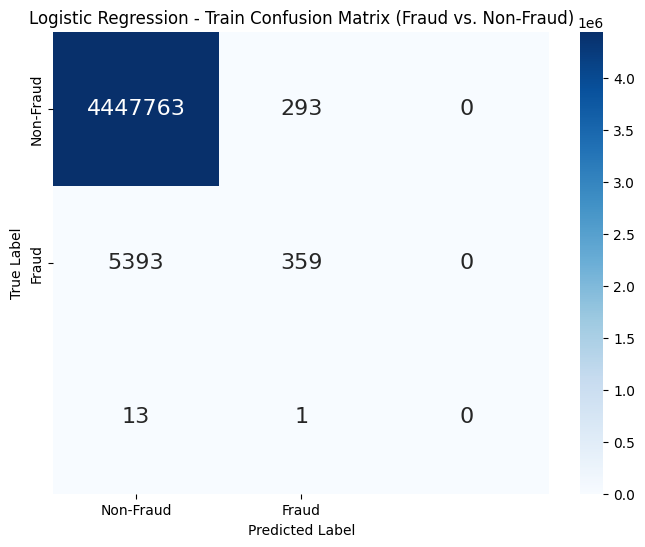

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined and fitted the logistic regression model (model_lr)
model_lr.fit(X_train_original, y_train_original)

# Predictions on the training set
y_train_pred_lr = model_lr.predict(X_train_original)

# Create confusion matrix for fraud (positive class) and non-fraud (negative class)
conf_matrix_lr_train = confusion_matrix(y_train_original, y_train_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16},
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Logistic Regression - Train Confusion Matrix (Fraud vs. Non-Fraud)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
